# TP2

# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés de l'année 1890 avec Yake

https://github.com/LIAAD/yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [4]:

for f in sorted(files)[281:381]:
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1890-01-05_01-00004.txt mentions these keywords: lieu qu'une, Commencera demain, commun ètïï, dit notaire, notaire adjugera, vente n’ù, BONNE MAISON, dee ventes, JOLIE MAISON, JUPES DRAPÉES, Adjudication préparatoire, neUirei Bruxelles...
KB_JB838_1890-01-06_01-00003.txt mentions these keywords: Maison rue, miss Sterly, grande maison, Sterly endormie, petite maison, maison rente, énormes griffes, rue Royale, louer bel, rue Thiéfry, apercevant miss...
KB_JB838_1890-01-08_01-00003.txt mentions these keywords: Manteaux Victoria, rue Haute, Jaquettes Jaquettes, rue Pachéco, Baume Pectoral, rue dés, d’agparells d'éclairage, MAISONS rue, rue Montoyer...
KB_JB838_1890-01-09_01-00003.txt mentions these keywords: rue Haute, rue Pachéco, rue Terre-Neuve, Crédit mobilier, dangereux chargement, chargement per-dessus, plus fermes, rue Royale, per-dessus bord...
KB_JB838_1890-01-12_01-00004.txt mentions these keywords: Bruxelles rue, notaire Jacobs, BONNE MAISON, dit notaire, Halles BRUXELL

# Nuages de mots

## Imports et stopwords

In [5]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux de 1890

In [7]:
# Choisir une année
year = 1890

In [8]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1890-01-05_01-00004.txt',
 'KB_JB838_1890-01-06_01-00003.txt',
 'KB_JB838_1890-01-08_01-00003.txt',
 'KB_JB838_1890-01-09_01-00003.txt',
 'KB_JB838_1890-01-12_01-00004.txt',
 'KB_JB838_1890-01-15_01-00001.txt',
 'KB_JB838_1890-01-16_01-00002.txt',
 'KB_JB838_1890-01-20_01-00001.txt',
 'KB_JB838_1890-01-24_01-00003.txt',
 'KB_JB838_1890-01-25_01-00001.txt',
 'KB_JB838_1890-01-27_01-00002.txt',
 'KB_JB838_1890-01-29_01-00004.txt',
 'KB_JB838_1890-02-02_01-00004.txt',
 'KB_JB838_1890-02-05_01-00001.txt',
 'KB_JB838_1890-02-05_01-00008.txt',
 'KB_JB838_1890-02-07_01-00001.txt',
 'KB_JB838_1890-02-09_01-00003.txt',
 'KB_JB838_1890-02-12_01-00002.txt',
 'KB_JB838_1890-02-16_01-00004.txt',
 'KB_JB838_1890-02-23_01-00003.txt',
 'KB_JB838_1890-03-04_01-00001.txt',
 'KB_JB838_1890-03-09_01-00007.txt',
 'KB_JB838_1890-03-13_01-00002.txt',
 'KB_JB838_1890-03-27_01-00001.txt',
 'KB_JB838_1890-04-01_01-00003.txt',
 'KB_JB838_1890-04-01_01-00004.txt',
 'KB_JB838_1890-04-05_01-00003.txt',
 

In [9]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [10]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [11]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de "

In [12]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [13]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de marchandises déclassées,. priais bien une tiqüidaUqm ' Irûle de tous nos articles. ' ; iPendant la durée de la vente -toutes nos marchandnëê/sUm aucune* exception : SOfEMîmJi' VELOURS, LAINAGES, DRAPEWm, TISSUS POUR R ALS' ET SOIRÉES, ROBES ET-' MANTEAUX, FOURRURES, JUPES DRAPÉES-, PEIGNOIRS-, MORES"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage

In [14]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [15]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1890_clean.txt!'

In [16]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'commencera demain lundi janvier vente lieu fois ail driétr commun ètïï confondüè ùucune mise vente vente soldes marchandises déclassées priais tiqüidauqm irûle articles ipendant durée vente marchandnëê sum aucune exception sofemîmji velours lainages drapewm tissus als soirées robes manteaux fourrures jupes drapées peignoirs mores intérieur chales corsets jupons dessous sorties maletde théâtre vendu prix inventaire dés différences priât grandes pvix réels prix invéntaite trouve snr chaque pièce m'

## Nuage de mots

### Afficher les termes les plus fréquents


In [17]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rue', 3335), ('dem', 1656), ('maison', 1054), ('louer', 950), ('ans', 902), ('bruxelles', 893), ('place', 848), ('rossel', 682), ('demande', 642), ('fille', 634)]


### Créer, stocker et afficher le nuage de mots

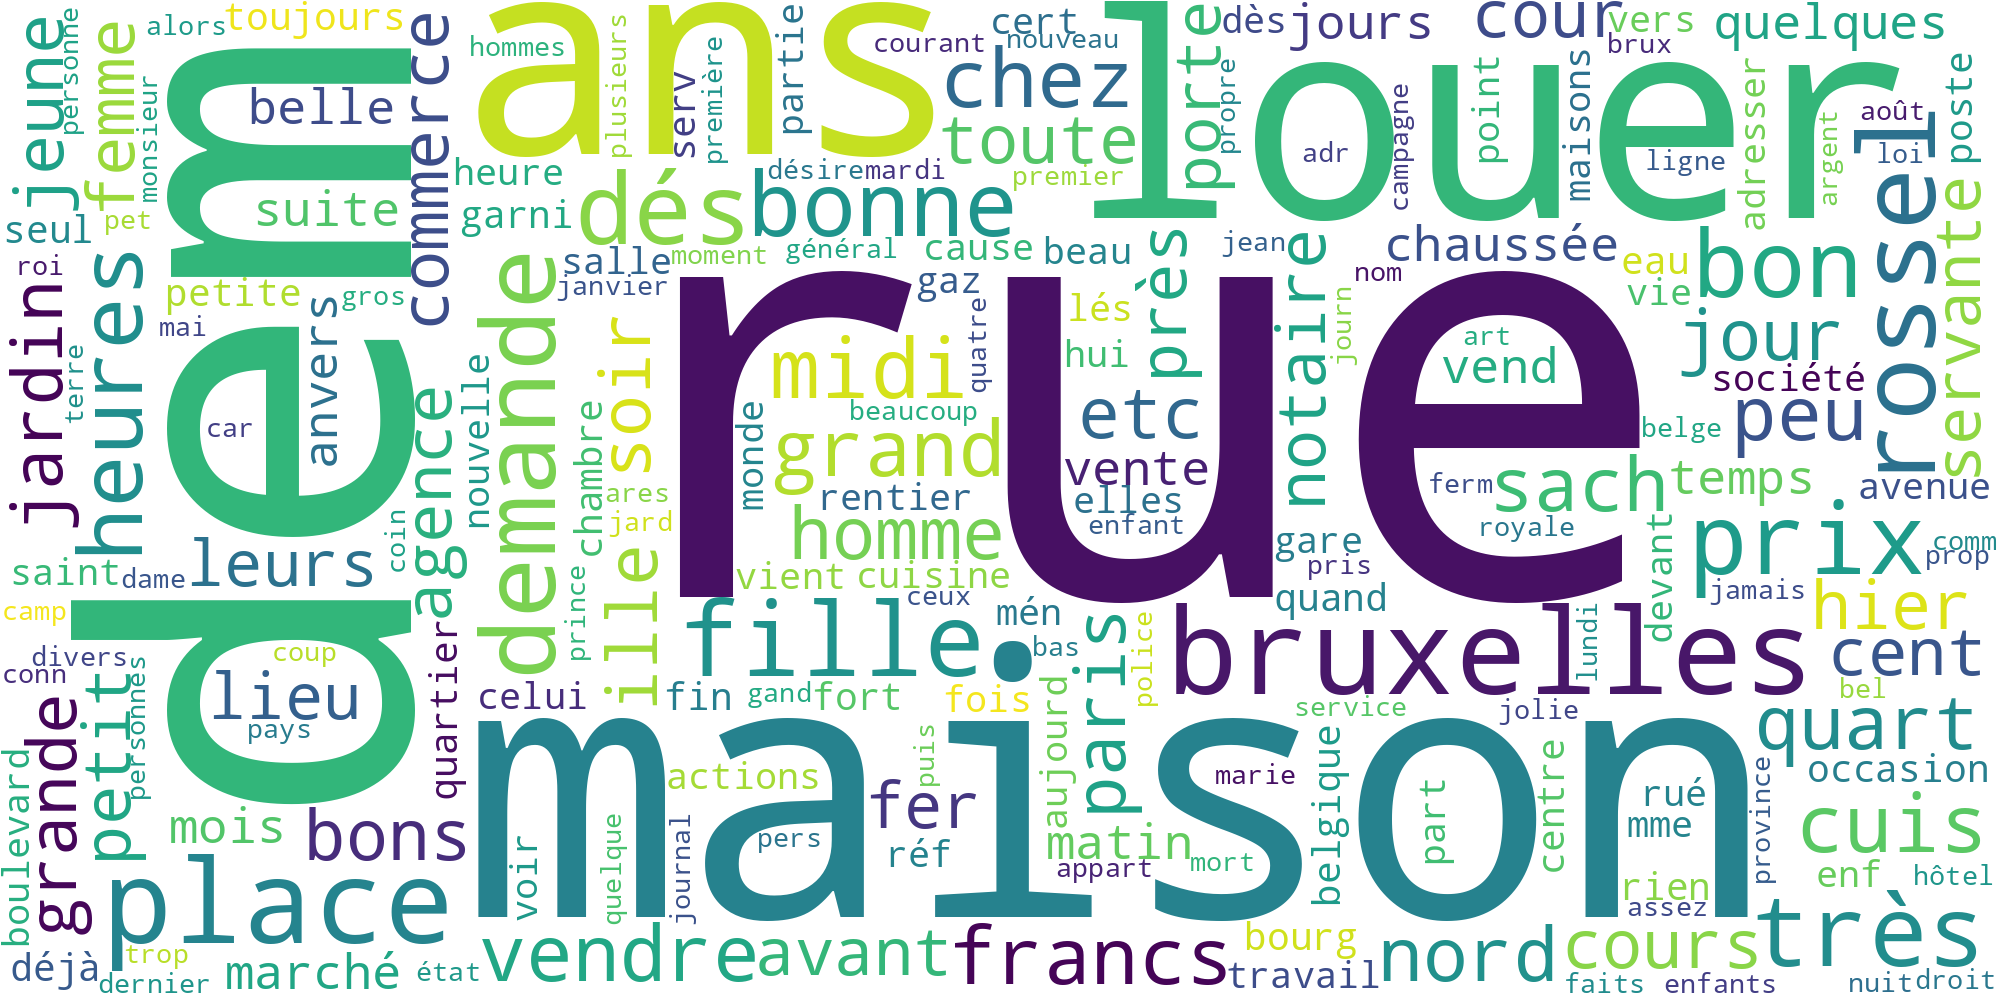

In [18]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [19]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [20]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [21]:
# Charger le texte
n=900000
text = open("../data/tmp/1890_clean.txt", encoding='utf-8').read()[:n]



In [22]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 1min 39s, sys: 3.66 s, total: 1min 42s
Wall time: 1min 42s


In [23]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [24]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

philippe apparait 18 fois dans le corpus
godard apparait 10 fois dans le corpus
léonard apparait 7 fois dans le corpus
borman apparait 7 fois dans le corpus
henri apparait 6 fois dans le corpus
poür apparait 6 fois dans le corpus
robert apparait 5 fois dans le corpus
chamb garn apparait 5 fois dans le corpus
crépinet apparait 5 fois dans le corpus
guédon apparait 5 fois dans le corpus
marini apparait 5 fois dans le corpus
jacques apparait 5 fois dans le corpus
francfort florentin apparait 4 fois dans le corpus
baume marp apparait 4 fois dans le corpus
madame apparait 4 fois dans le corpus
artevelde apparait 4 fois dans le corpus
etienne miller apparait 4 fois dans le corpus
criquebert apparait 4 fois dans le corpus
auguste apparait 4 fois dans le corpus
jacobs apparait 3 fois dans le corpus
martin apparait 3 fois dans le corpus
orban apparait 3 fois dans le corpus
herve wergifosse apparait 3 fois dans le corpus
quaregn trieu kaisin apparait 3 fois dans le corpus
martin toms apparait 3 

# Sentiment analysis avec Textblob-FR

Documentation: https://textblob.readthedocs.io/en/dev/

## Imports

In [25]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [26]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [27]:
get_sentiment("leu5 des témoins qui avaient été cités ilniis le pfocëà ont été incarcérés")

This text is neutral and perfectly objective.


In [28]:
get_sentiment("Tout le inonde veut s’en aller muni d’un- mandat officiel et... de frais de voyage, .")

This text is 17% positive and 0.10000000000000002% subjective.


In [29]:
get_sentiment(" Costumes Loéïï bs 22 brun.Fr.39,29 et tmtm* Veston, faux gilet et ' ■' Ho en peigné 4 et bleu, bordés.")

This text is 23% negative and 0.2% subjective.


In [30]:
get_sentiment("On recherche les étoffes ni trop légères ni trop épaisses, ni trop claires ni trop foncées, - on tient aussi n être habillé au goût du jour y sans forcer son budget")

This text is 6% negative and 0.24000000000000005% subjective.


In [31]:
get_sentiment("Là, seule, appuyant sa jouo brûlante contre les feuilles de la glycine, elle restait accoudée, perdue dans uno confuse méditation, en face du lac encore tout fumeux do la dernière pluie.")

This text is 17% negative and 0.20000000000000004% subjective.


In [32]:
get_sentiment("Il mettait d’enfantins raffinements de coqucltciio à paraître élégant et jeune.")

This text is 29% positive and 0.5333333333333333% subjective.


In [33]:
get_sentiment("Nos industriels se plaignent toujours, avec Dlus ou moins de raison, de ne pouvoir donner plus d’extension à iénrs affaires, le pays étant trop petit et nos voisins fermant leurs portes à nos produits par lés droits d’entrée.")

This text is 9% positive and 0.05% subjective.


In [34]:
get_sentiment("Aussi bien le Waux-Hall est bien vieux, bien démodé et l’on sait qu’il nous faut du nouveau, n’en fût? il plus au monde.")

This text is 13% positive and 0.19285714285714287% subjective.


In [35]:
get_sentiment("MM. Lepage et Martiny ont fait lundi un dernier effort pour le sauver. ")

This text is 29% negative and 0.2% subjective.


In [36]:
get_sentiment("Voici le soleil, et le calme qui renaît dans la belle nature.")

This text is 41% positive and 0.5499999999999999% subjective.
